In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import glob
import tqdm


In [2]:
data = pd.read_csv('20241116_Pratibha_IPs_DDA_MQ_matchBwRuns_LFQ_psdct200Kto600K_log2_MScountAvg5_noImp_volcano_plots_LESSstringent_interactors_list_CtrHitsSubt_noAltIPsubt_noRNASEonly.txt',sep='\t')

In [3]:
data.head()

,log2FC,genes,pval,fcSig,bait
0,2.863816,RPS9,0.010517,pval < 0.05 and log2FC > 1,V5_RNPS1_noR
1,3.166381,KHSRP,0.004943,pval < 0.05 and log2FC > 1,V5_RNPS1_noR
2,1.578380,HNRNPDL,0.040889,pval < 0.05 and log2FC > 1,V5_RNPS1_noR
3,2.619769,RPL17;RPL17-C18orf32,0.001358,pval < 0.05 and log2FC > 1,V5_RNPS1_noR
4,2.216671,AP2M1,0.008888,pval < 0.05 and log2FC > 1,V5_RNPS1_noR


In [4]:
data['bait'].value_counts()

bait
V5_RNPS1_noR    236
V5_GRB2_noR     220
Name: count, dtype: int64

In [5]:
data = data[data['bait'].str.contains('noR')]

In [6]:
data.head()

,log2FC,genes,pval,fcSig,bait
0,2.863816,RPS9,0.010517,pval < 0.05 and log2FC > 1,V5_RNPS1_noR
1,3.166381,KHSRP,0.004943,pval < 0.05 and log2FC > 1,V5_RNPS1_noR
2,1.578380,HNRNPDL,0.040889,pval < 0.05 and log2FC > 1,V5_RNPS1_noR
3,2.619769,RPL17;RPL17-C18orf32,0.001358,pval < 0.05 and log2FC > 1,V5_RNPS1_noR
4,2.216671,AP2M1,0.008888,pval < 0.05 and log2FC > 1,V5_RNPS1_noR


In [7]:
ppi_df = []
ppi_dict = {}
for g in ['RNPS1', 'GRB2']:
    ppi_dict[g] = {}

    ppi_df.append([g,len(set(data[data['bait']==f'V5_{g}_noR']['genes'])), 'RNAse-'])
    ppi_dict[g]['RNAse-'] = list(set(data[data['bait']==f'V5_{g}_noR']['genes']))


In [8]:
pd.DataFrame(ppi_df, columns = ['RBP', 'num', 'ppi_type'])

,RBP,num,ppi_type
0,RNPS1,236,RNAse-
1,GRB2,220,RNAse-


In [9]:
data['bait_protein'] = data.apply(lambda x: x['bait'].split('_')[1], axis=1)
data['rnase'] = data.apply(lambda x: x['bait'].split('_')[2], axis=1)

In [10]:
data.head()

,log2FC,genes,pval,fcSig,bait,bait_protein,rnase
0,2.863816,RPS9,0.010517,pval < 0.05 and log2FC > 1,V5_RNPS1_noR,RNPS1,noR
1,3.166381,KHSRP,0.004943,pval < 0.05 and log2FC > 1,V5_RNPS1_noR,RNPS1,noR
2,1.578380,HNRNPDL,0.040889,pval < 0.05 and log2FC > 1,V5_RNPS1_noR,RNPS1,noR
3,2.619769,RPL17;RPL17-C18orf32,0.001358,pval < 0.05 and log2FC > 1,V5_RNPS1_noR,RNPS1,noR
4,2.216671,AP2M1,0.008888,pval < 0.05 and log2FC > 1,V5_RNPS1_noR,RNPS1,noR


In [11]:
data_rnps1 = data[data['bait_protein']=='RNPS1']
data_GRB2 = data[data['bait_protein']=='GRB2']

In [12]:
def assign_interaction(r, prey):
    if prey in ppi_dict[r]['RNAse-']:
        return "RNAse-"

In [13]:
data_rnps1['interaction'] = data_rnps1.apply(lambda x: assign_interaction(x['bait_protein'], x['genes']), axis=1)

/tmp/ipykernel_1151637/2506725637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rnps1['interaction'] = data_rnps1.apply(lambda x: assign_interaction(x['bait_protein'], x['genes']), axis=1)


In [14]:
data_GRB2['interaction'] = data_GRB2.apply(lambda x: assign_interaction(x['bait_protein'], x['genes']), axis=1)

/tmp/ipykernel_1151637/2625204418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_GRB2['interaction'] = data_GRB2.apply(lambda x: assign_interaction(x['bait_protein'], x['genes']), axis=1)


In [15]:
data_GRB2.dropna()

,log2FC,genes,pval,fcSig,bait,bait_protein,rnase,interaction
236,3.333321,RPS9,0.000055,pval < 0.05 and log2FC > 1,V5_GRB2_noR,GRB2,noR,RNAse-
237,3.796120,RBM15,0.003357,pval < 0.05 and log2FC > 1,V5_GRB2_noR,GRB2,noR,RNAse-
238,3.119738,RPL17;RPL17-C18orf32,0.001738,pval < 0.05 and log2FC > 1,V5_GRB2_noR,GRB2,noR,RNAse-
239,3.243795,RAVER1,0.010435,pval < 0.05 and log2FC > 1,V5_GRB2_noR,GRB2,noR,RNAse-
240,4.175650,ASAP1,0.000082,pval < 0.05 and log2FC > 1,V5_GRB2_noR,GRB2,noR,RNAse-
...,...,...,...,...,...,...,...,...
451,2.796471,RTCB,0.017780,pval < 0.05 and log2FC > 1,V5_GRB2_noR,GRB2,noR,RNAse-
452,4.059783,RPL36,0.000103,pval < 0.05 and log2FC > 1,V5_GRB2_noR,GRB2,noR,RNAse-
453,2.083355,KCTD3,0.034372,pval < 0.05 and log2FC > 1,V5_GRB2_noR,GRB2,noR,RNAse-
454,2.920123,CD2AP,0.001507,pval < 0.05 and log2FC > 1,V5_GRB2_noR,GRB2,noR,RNAse-


In [16]:
data_rnps1.dropna()

,log2FC,genes,pval,fcSig,bait,bait_protein,rnase,interaction
0,2.863816,RPS9,0.010517,pval < 0.05 and log2FC > 1,V5_RNPS1_noR,RNPS1,noR,RNAse-
1,3.166381,KHSRP,0.004943,pval < 0.05 and log2FC > 1,V5_RNPS1_noR,RNPS1,noR,RNAse-
2,1.578380,HNRNPDL,0.040889,pval < 0.05 and log2FC > 1,V5_RNPS1_noR,RNPS1,noR,RNAse-
3,2.619769,RPL17;RPL17-C18orf32,0.001358,pval < 0.05 and log2FC > 1,V5_RNPS1_noR,RNPS1,noR,RNAse-
4,2.216671,AP2M1,0.008888,pval < 0.05 and log2FC > 1,V5_RNPS1_noR,RNPS1,noR,RNAse-
...,...,...,...,...,...,...,...,...
231,1.534963,SNX9,0.033947,pval < 0.05 and log2FC > 1,V5_RNPS1_noR,RNPS1,noR,RNAse-
232,1.641098,CFAP20,0.025183,pval < 0.05 and log2FC > 1,V5_RNPS1_noR,RNPS1,noR,RNAse-
233,3.758112,ACIN1,0.000084,pval < 0.05 and log2FC > 1,V5_RNPS1_noR,RNPS1,noR,RNAse-
234,1.655187,CHTOP,0.008141,pval < 0.05 and log2FC > 1,V5_RNPS1_noR,RNPS1,noR,RNAse-


In [17]:
protein_network_df = pd.read_csv('../protein_network_analysis/9606.protein.physical.links.v12.0.txt.gz', sep=' ')

In [18]:
protein_info = pd.read_csv('../protein_network_analysis/9606.protein.info.v12.0.txt.gz', sep='\t')
protein_info_dict = dict(zip(protein_info['#string_protein_id'], protein_info['preferred_name']))

In [19]:
protein_network_df['protein1_name'] = protein_network_df.protein1.map(protein_info_dict)

In [20]:
protein_network_df['protein2_name'] = protein_network_df.protein2.map(protein_info_dict)

In [21]:
protein_network_df.head()

,protein1,protein2,combined_score,protein1_name,protein2_name
0,9606.ENSP00000000233,9606.ENSP00000257770,311,ARF5,NT5E
1,9606.ENSP00000000233,9606.ENSP00000226004,161,ARF5,DUSP3
2,9606.ENSP00000000233,9606.ENSP00000434442,499,ARF5,ARFGAP2
3,9606.ENSP00000000233,9606.ENSP00000262455,531,ARF5,ERP44
4,9606.ENSP00000000233,9606.ENSP00000303145,499,ARF5,TMED10


In [22]:
string_grb2 = protein_network_df[(protein_network_df['protein1_name'].isin(['GRB2']))]

In [23]:
string_rnps1 = protein_network_df[(protein_network_df['protein1_name'].isin(['RNPS1']))]

In [24]:
string_grb2.head()

,protein1,protein2,combined_score,protein1_name,protein2_name
1010961,9606.ENSP00000376345,9606.ENSP00000300692,497,GRB2,CD3D
1010962,9606.ENSP00000376345,9606.ENSP00000085219,608,GRB2,CD22
1010963,9606.ENSP00000376345,9606.ENSP00000497910,546,GRB2,B2M
1010964,9606.ENSP00000376345,9606.ENSP00000361423,981,GRB2,ABL1
1010965,9606.ENSP00000376345,9606.ENSP00000231134,198,GRB2,PCDHB5


In [25]:
string_rnps1.head()

,protein1,protein2,combined_score,protein1_name,protein2_name
1327620,9606.ENSP00000457723,9606.ENSP00000323696,211,RNPS1,CRTAP
1327621,9606.ENSP00000457723,9606.ENSP00000367406,329,RNPS1,TAF2
1327622,9606.ENSP00000457723,9606.ENSP00000337632,220,RNPS1,SARNP
1327623,9606.ENSP00000457723,9606.ENSP00000348056,254,RNPS1,UBE2I
1327624,9606.ENSP00000457723,9606.ENSP00000440163,163,RNPS1,FAM9A


In [26]:
ap_ms_unique_grb2 = set(data_GRB2['genes']).difference(set(string_grb2['protein2_name']))
ap_ms_unique_rnps1 = set(data_rnps1['genes']).difference(set(string_rnps1['protein2_name']))

<Axes: xlabel='0', ylabel='2'>

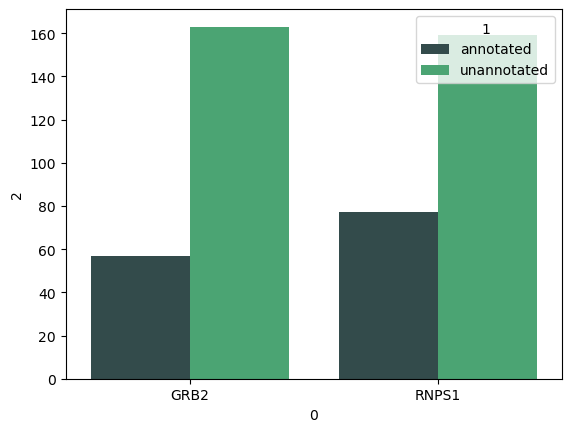

In [27]:
sns.barplot(data=pd.DataFrame([['GRB2', 'annotated', len(set(data_GRB2['genes']).intersection(set(string_grb2['protein2_name'])))],
 ['GRB2', 'unannotated', len(set(data_GRB2['genes']).difference(set(string_grb2['protein2_name'])))],
 ['RNPS1', 'annotated', len(set(data_rnps1['genes']).intersection(set(string_rnps1['protein2_name'])))],
 ['RNPS1', 'unannotated', len(set(data_rnps1['genes']).difference(set(string_rnps1['protein2_name'])))]]),
            x=0,
            y=2,
            hue=1, palette=['darkslategrey', 'mediumseagreen'])
# plt.savefig('./figures/interactions_barplot_annotated_label_noRNAseonly.png')
# plt.savefig('./figures/interactions_barplot_annotated_label_noRNAseonly.svg')
# plt.savefig('./figures/interactions_barplot_annotated_label_noRNAseonly.jpg')